In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['pdf.fonttype'] = 42

# Figure 7a

In [2]:
from src.DMS_Profile import DMS_Profile, combine_profiles, Genome, Annotation

In [3]:
# load genome and annotation

genome = Genome('../data/genome/scer_chr_kan.FASTA')
annotation = Annotation('../data/genome/scer_kan.gff')

intron-containing transcripts: 283
intron-less transcripts: 6290
structured RNA transcripts: 100


In [4]:
# load CoSTseq and DMS-MaPseq data

dms_pro = combine_profiles([ DMS_Profile('../data/processed/pro_wild_1_mRNA_agg.pkl', 'wild_R1', genome), 
                             DMS_Profile('../data/processed/pro_wild_2_mRNA_agg.pkl', 'wild_R2', genome), 
                             DMS_Profile('../data/processed/pro_wild_3_mRNA_agg.pkl', 'wild_R3', genome),
                             DMS_Profile('../data/processed/pro_dbp7_1_mRNA_agg.pkl', 'dbp7_R1', genome), 
                             DMS_Profile('../data/processed/pro_dbp7_2_mRNA_agg.pkl', 'dbp7_R2', genome), 
                             DMS_Profile('../data/processed/pro_dbp7_3_mRNA_agg.pkl', 'dbp7_R3', genome),
                             DMS_Profile('../data/processed/pro_dbp3_1_mRNA_agg.pkl', 'dbp3_R1', genome), 
                             DMS_Profile('../data/processed/pro_dbp3_2_mRNA_agg.pkl', 'dbp3_R2', genome), 
                             DMS_Profile('../data/processed/pro_dbp3_3_mRNA_agg.pkl', 'dbp3_R3', genome),
                             DMS_Profile('../data/processed/pro_spt4_1_mRNA_agg.pkl', 'spt4_R1', genome), 
                             DMS_Profile('../data/processed/pro_spt4_2_mRNA_agg.pkl', 'spt4_R2', genome), 
                             DMS_Profile('../data/processed/pro_spt4_3_mRNA_agg.pkl', 'spt4_R3', genome),
                             DMS_Profile('../data/processed/pro_stm1_1_mRNA_agg.pkl', 'stm1_R1', genome), 
                             DMS_Profile('../data/processed/pro_stm1_2_mRNA_agg.pkl', 'stm1_R2', genome), 
                             DMS_Profile('../data/processed/pro_stm1_3_mRNA_agg.pkl', 'stm1_R3', genome)], 'all_pro', genome, min_cov=900)

dms_mat = combine_profiles([ DMS_Profile('../data/processed/mat_wild_1_mRNA_agg.pkl', 'wild_R1', genome), 
                             DMS_Profile('../data/processed/mat_wild_2_mRNA_agg.pkl', 'wild_R2', genome), 
                             DMS_Profile('../data/processed/mat_wild_3_mRNA_agg.pkl', 'wild_R3', genome),
                             DMS_Profile('../data/processed/mat_dbp7_1_mRNA_agg.pkl', 'dbp7_R1', genome), 
                             DMS_Profile('../data/processed/mat_dbp7_2_mRNA_agg.pkl', 'dbp7_R2', genome), 
                             DMS_Profile('../data/processed/mat_dbp7_3_mRNA_agg.pkl', 'dbp7_R3', genome),
                             DMS_Profile('../data/processed/mat_dbp3_1_mRNA_agg.pkl', 'dbp3_R1', genome), 
                             DMS_Profile('../data/processed/mat_dbp3_2_mRNA_agg.pkl', 'dbp3_R2', genome), 
                             DMS_Profile('../data/processed/mat_dbp3_3_mRNA_agg.pkl', 'dbp3_R3', genome),
                             DMS_Profile('../data/processed/mat_spt4_1_mRNA_agg.pkl', 'spt4_R1', genome), 
                             DMS_Profile('../data/processed/mat_spt4_2_mRNA_agg.pkl', 'spt4_R2', genome), 
                             DMS_Profile('../data/processed/mat_spt4_3_mRNA_agg.pkl', 'spt4_R3', genome),
                             DMS_Profile('../data/processed/mat_stm1_1_mRNA_agg.pkl', 'stm1_R1', genome), 
                             DMS_Profile('../data/processed/mat_stm1_2_mRNA_agg.pkl', 'stm1_R2', genome), 
                             DMS_Profile('../data/processed/mat_stm1_3_mRNA_agg.pkl', 'stm1_R3', genome)], 'all_mat', genome, min_cov=900)

/opt/homebrew/Caskroom/miniforge/base/envs/CoST/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


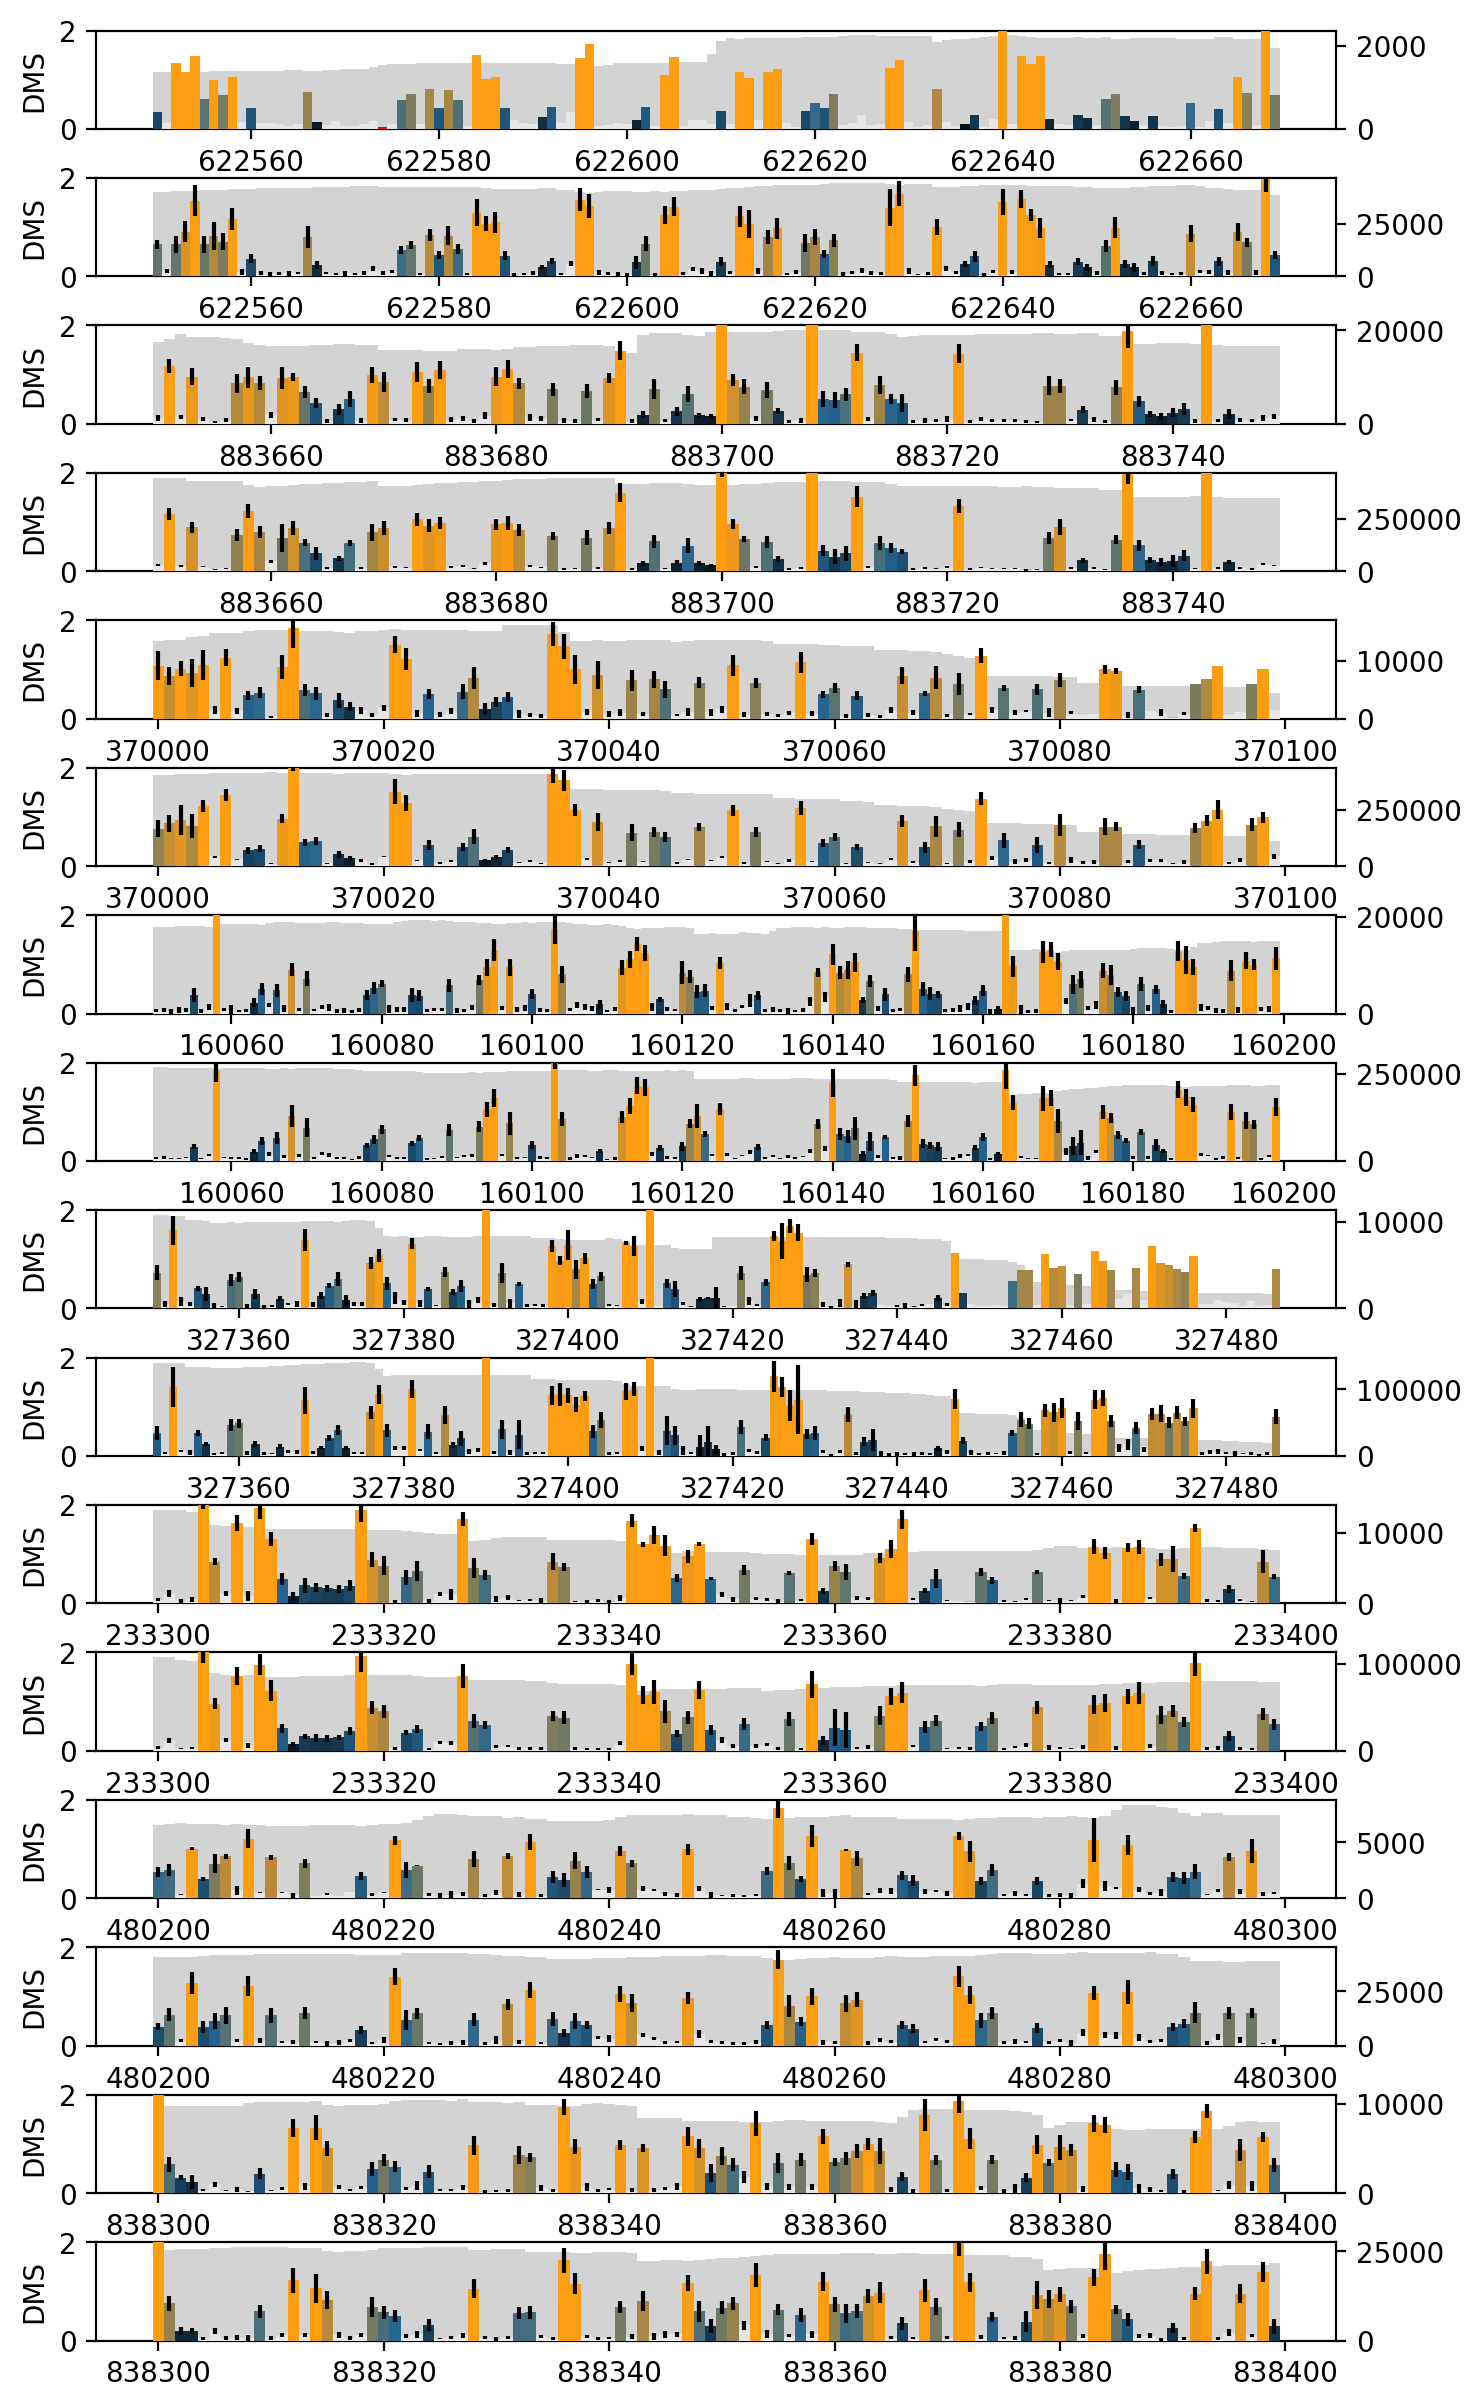

In [5]:
# draw figure

good_genes = ['SOD1', 'TDH3', 'CCW12', 'ADH1', 'FBA1', 'PDC1', 'PMA1', 'ILV5']
good_chrms = [9,      6,      11,      14,     10,     11,     6,      11]
good_strnd = ['-',    '-',    '-',     '-',    '-',    '-',    '-',    '-']
good_coord = [(622550, 622670), (883650, 883750), (370000, 370100), (160050, 160200), (327350, 327487), (233300, 233400), (480200, 480300), (838300, 838400)]

i = 7
chrom = good_chrms[i]
strand = good_strnd[i]
coords = (838066, 838400)


fig, axs = plt.subplots(2*len(good_genes), 1, figsize=[8, 15], sharex=False, sharey=True)
plt.subplots_adjust(hspace=0.5)

for i in range(len(good_genes)):

    ax0 = axs[2*i].twinx()
    dms_pro.plot_profile(good_chrms[i], good_strnd[i], good_coord[i][0], good_coord[i][1], genome, axs[2*i], cmap_loc='../cmap.txt')
    ax0.bar(np.arange(good_coord[i][0], good_coord[i][1]), dms_pro.cov_m[good_chrms[i]][good_coord[i][0]:good_coord[i][1]], 1, color='lightgray')
    axs[2*i].set_zorder(10)
    axs[2*i].set_frame_on(False)

    ax0 = axs[2*i+1].twinx()
    dms_mat.plot_profile(good_chrms[i], good_strnd[i], good_coord[i][0], good_coord[i][1], genome, axs[2*i+1], cmap_loc='../cmap.txt')
    ax0.bar(np.arange(good_coord[i][0], good_coord[i][1]), dms_mat.cov_m[good_chrms[i]][good_coord[i][0]:good_coord[i][1]], 1, color='lightgray')
    axs[2*i+1].set_zorder(10)
    axs[2*i+1].set_frame_on(False)


plt.setp(axs, ylim=(0, 2), ylabel='DMS')
plt.show()

# Figure 7b

In [6]:
from src.DMS_Profile import gini_for_transcripts
from scipy.stats import mannwhitneyu

In [7]:
# calculate Gini index for different transcript classes

gini_transcript_cont, corr_transcript_cont = gini_for_transcripts(dms_mat, dms_pro, annotation.intron_cont, genome, annotation, min_nt_gini=30, min_frac_of_transcript_gini=0.1)
gini_transcript_less, corr_transcript_less = gini_for_transcripts(dms_mat, dms_pro, annotation.intron_less, genome, annotation, min_nt_gini=30, min_frac_of_transcript_gini=0.1)
gini_transcript_stru, corr_transcript_stru = gini_for_transcripts(dms_mat, dms_pro, annotation.structured, genome, annotation, min_nt_gini=30, min_frac_of_transcript_gini=0.1)

x_cont = [i[0] for i in list(gini_transcript_cont['CDS'].values())]
y_cont = [i[1] for i in list(gini_transcript_cont['CDS'].values())]
x_less = [i[0] for i in list(gini_transcript_less['CDS'].values())]
y_less = [i[1] for i in list(gini_transcript_less['CDS'].values())]
x_stru = [i[0] for i in list(gini_transcript_stru['noncoding_exon'].values())]
y_stru = [i[1] for i in list(gini_transcript_stru['noncoding_exon'].values())]

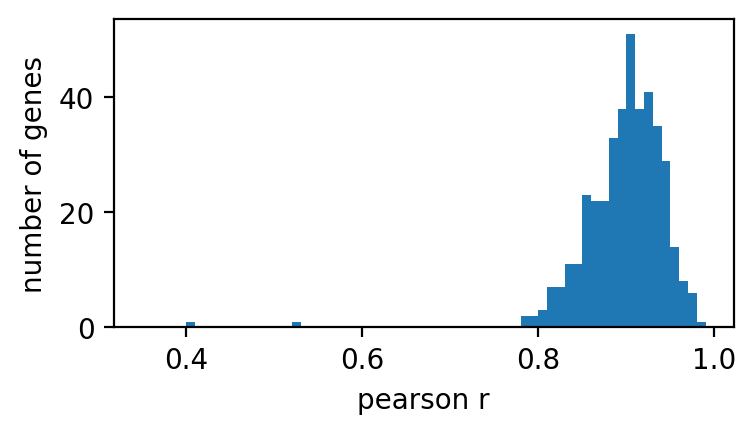

In [8]:
plt.figure(figsize=(4, 2))

plt.hist(list(corr_transcript_less['CDS'].values()) + list(corr_transcript_cont['CDS'].values()), bins=np.arange(0.35, 1, 0.01))
plt.xlabel('pearson r')
plt.ylabel('number of genes')
plt.show()

# Figure 7c

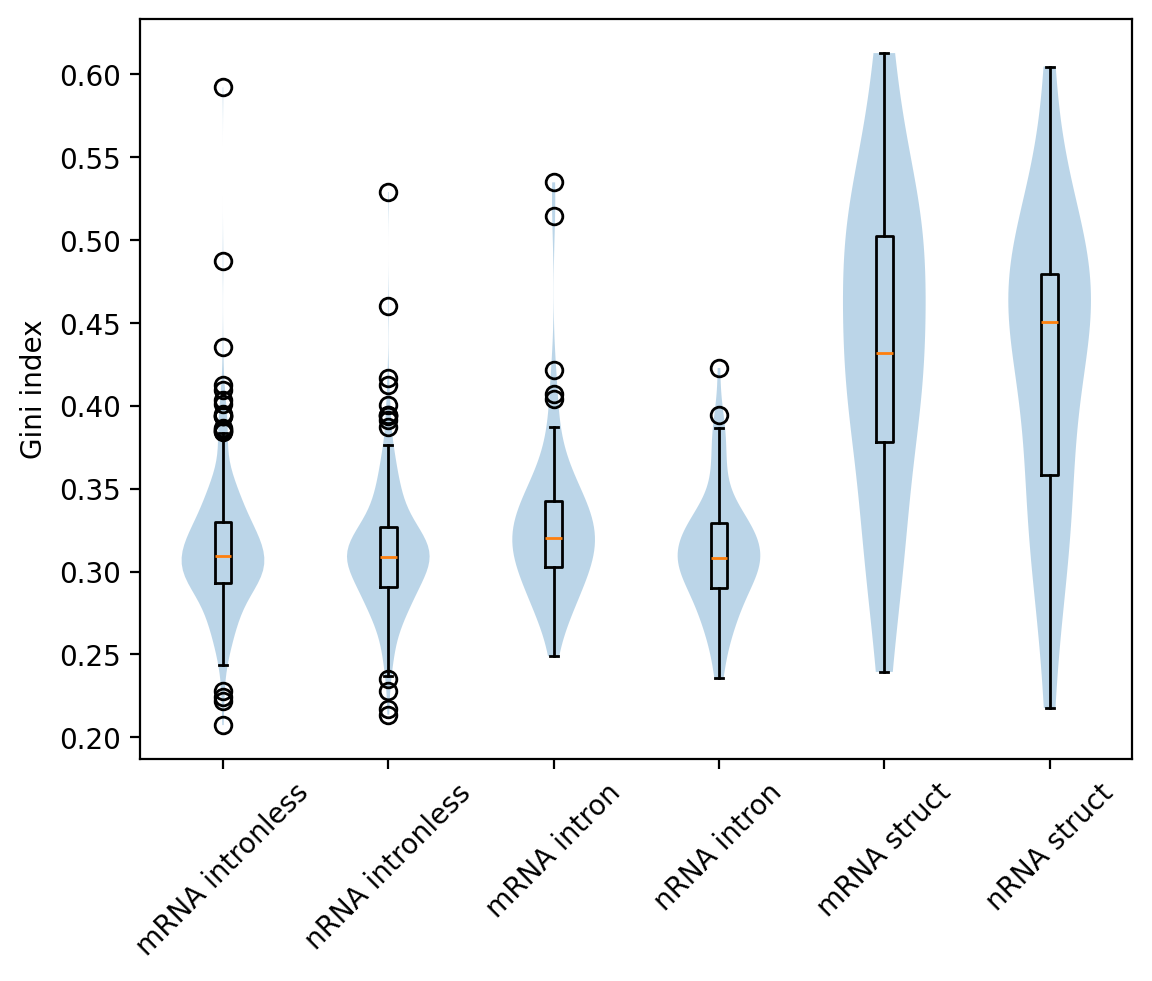

p-value intronless: 0.716
p-value intron-containing: 0.013
p-value structured: 0.509


In [9]:
# draw figure

plt.violinplot([x_less, y_less, x_cont, y_cont, x_stru, y_stru], showextrema=False)
plt.boxplot([x_less, y_less, x_cont, y_cont, x_stru, y_stru], widths=0.1)
plt.xticks([1, 2, 3, 4, 5, 6], ['mRNA intronless', 'nRNA intronless', 'mRNA intron', 'nRNA intron', 'mRNA struct', 'nRNA struct'], rotation=45)
plt.ylabel('Gini index')
plt.show()

print(f"p-value intronless: {mannwhitneyu(x_less, y_less).pvalue:.3f}")
print(f"p-value intron-containing: {mannwhitneyu(x_cont, y_cont).pvalue:.3f}")
print(f"p-value structured: {mannwhitneyu(x_stru, y_stru).pvalue:.3f}")

# Figure S7a

In [10]:
from src.bam_utils import reverse_complement
from tqdm import tqdm
from src.dms_utils import fold_parallel
import pickle

In [11]:
# load wildtype DMS-MaPseq data
wild = combine_profiles([DMS_Profile('../data/processed/mat_wild_1_mRNA_agg.pkl', 'wild_R1', genome), 
                         DMS_Profile('../data/processed/mat_wild_2_mRNA_agg.pkl', 'wild_R2', genome), 
                         DMS_Profile('../data/processed/mat_wild_3_mRNA_agg.pkl', 'wild_R3', genome)], 'wild', genome)

/opt/homebrew/Caskroom/miniforge/base/envs/CoST/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [12]:
# export high coverage transcripts for structure prediction

avg_cov_thresh = 2000

# find transcript with highest coverage in mRNA DMS data
chrom_dict = {'chrI':0, 'chrII':1, 'chrIII':2, 'chrIV':3, 'chrV':4, 'chrVI':5, 'chrVII':6, 'chrVIII':7, 'chrIX':8, 'chrX':9, 'chrXI':10, 'chrXII':11, 'chrXIII':12, 'chrXIV':13, 'chrXV':14, 'chrXVI':15, 'chrmt':16, 'KanMX':17}
cov_dict = {}
for idx, trx in enumerate(annotation.intron_less):
    if annotation.db[trx].strand == '+':
        avg_cov = np.mean(wild.cov_p[chrom_dict[annotation.db[trx][0]]][int(annotation.db[trx][3]):int(annotation.db[trx][4])])
    elif annotation.db[trx].strand == '-':
        avg_cov = np.mean(wild.cov_m[chrom_dict[annotation.db[trx][0]]][int(annotation.db[trx][3]):int(annotation.db[trx][4])])
    
    cov_dict[trx] = avg_cov

# extract sequence from top transcripts, until coverage is insufficient
high_cov_seqs = {}
for trx in sorted(cov_dict, key=cov_dict.get, reverse=True):
    if cov_dict[trx] >= avg_cov_thresh:
        if annotation.db[trx].strand == '+':
            seq = genome.seq[chrom_dict[annotation.db[trx][0]]][int(annotation.db[trx][3]-1):int(annotation.db[trx][4])].replace('T', 'U')
        elif annotation.db[trx].strand == '-':
            seq = reverse_complement(genome.seq[chrom_dict[annotation.db[trx][0]]][int(annotation.db[trx][3]-1):int(annotation.db[trx][4])]).replace('T', 'U')

        high_cov_seqs[trx] = seq

In [13]:
# run RNAstructure prediction and compute AUROC for each transcript

min_n = 10 # minimum number of nucleotides in each category (x2 min number of nt total)
x = np.hstack([np.arange(10, 305, 5), np.arange(320, 3020, 20)]) # maximum base pairing distance

# This takes a long time to run. I therefore provide the output for simplicity.
want_to_run = False
if want_to_run:
    
    aurocs_maxbp = []
    for maxbp in tqdm(x):

        dbr_all, eng_all = fold_parallel(list(high_cov_seqs.values()), maxbp=maxbp)

        aurocs = []
        for idx, trx in enumerate(list(high_cov_seqs.keys())):
            seq = high_cov_seqs[trx]
            dbr = dbr_all[idx]
            strand = annotation.db[trx].strand
            chrom = chrom_dict[annotation.db[trx][0]]
            start = int(annotation.db[trx][3])
            stop = int(annotation.db[trx][4])

            mask_seq = genome.mask_seq[chrom][start-1:stop] if strand == '+' else ~genome.mask_seq[chrom][start-1:stop][::-1]
            mask_cov = wild.mask_p[chrom][start-1:stop] if strand == '+' else wild.mask_m[chrom][start-1:stop][::-1]

            rea = wild.rat_p[chrom][start-1:stop] if strand == '+' else wild.rat_m[chrom][start-1:stop][::-1]

            mask_un = np.array([True if i == '.' else False for i in dbr]) & mask_seq & mask_cov
            mask_pa = np.array([True if i in [')', '('] else False for i in dbr]) & mask_seq & mask_cov

            # calculate auroc
            if np.sum(mask_un) <= min_n or np.sum(mask_pa) <= min_n:
                auroc_hat = np.nan
            else:
                auroc_hat = auroc(rea[mask_un], rea[mask_pa])

            aurocs.append(auroc_hat)

        aurocs_maxbp.append(aurocs)

else:
    with open('../data/aurocs_maxbp.pkl', 'rb') as f:
        _, aurocs_maxbp = pickle.load(f)

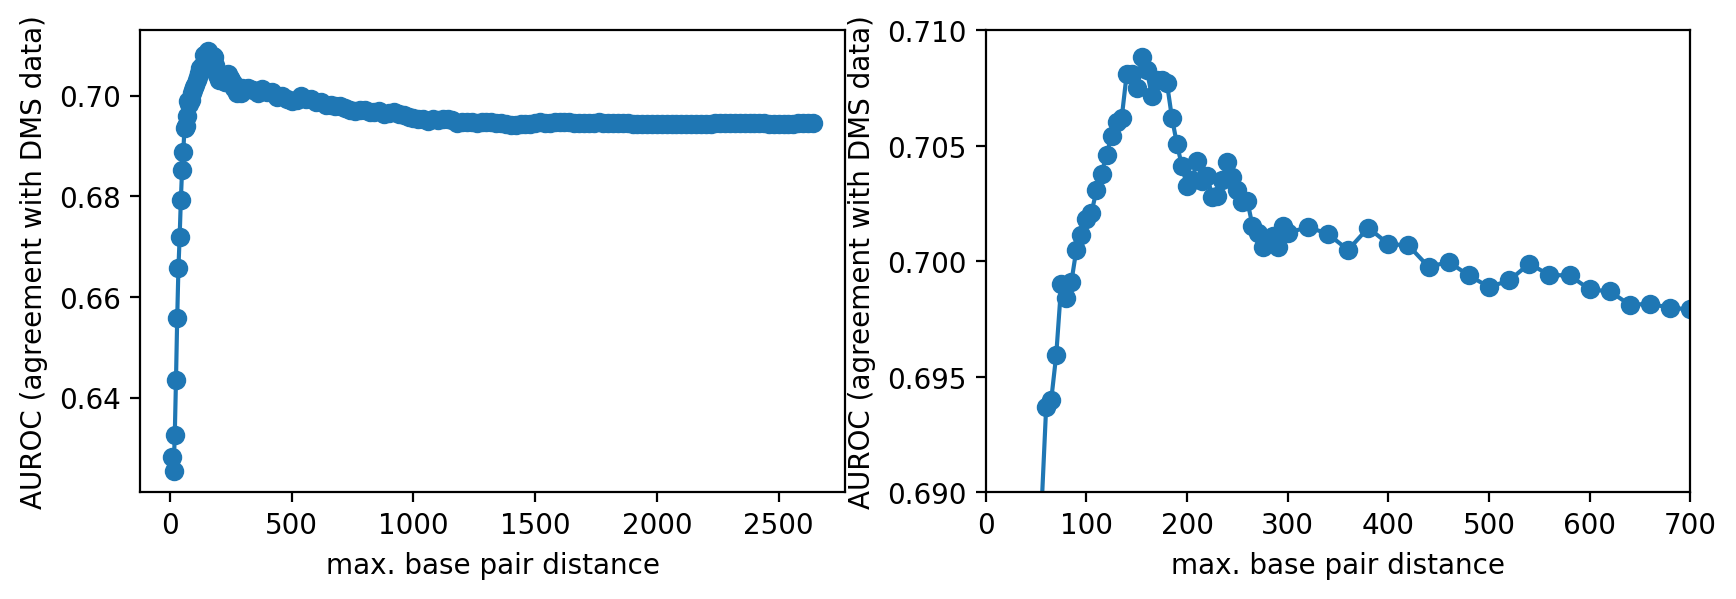

In [14]:
# draw figure

fig, axs = plt.subplots(1, 2, figsize=[10, 3])

axs[0].plot(x[:len(aurocs_maxbp)], np.nanmean(aurocs_maxbp, axis=1), 'o-')
axs[0].set_xlabel('max. base pair distance')
axs[0].set_ylabel('AUROC (agreement with DMS data)')

axs[1].plot(x[:len(aurocs_maxbp)], np.nanmean(aurocs_maxbp, axis=1), 'o-')
axs[1].set_xlabel('max. base pair distance')
axs[1].set_ylabel('AUROC (agreement with DMS data)')
axs[1].set_xlim([0, 700])
axs[1].set_ylim([0.69, 0.71])

plt.show()

# Figure S7b

In [15]:
from scipy.stats import pearsonr

In [16]:
def parse_icshape(filename, min_rpkm=500):
    icshape = {}
    with open(filename, 'r') as f:
        for line in f:
            rpkm = float(line.split('\t')[2])
            if rpkm >= min_rpkm:
                rea = np.array(line.strip().split('\t')[3:])
                rea[rea=='NULL'] = np.nan
                rea = rea.astype(float)
                icshape[line.split('\t')[0]] = rea
    return(icshape)

def collapse_reas(samples1, samples2, sid1, sid2):
    d = {k: (samples1[sid1][k], samples1[sid2][k], samples2[sid1][k], samples2[sid2][k]) for k in samples1[sid1].keys() if k in samples1[sid2] and k in samples2[sid1] and k in samples2[sid2]}
    
    nts_filt_1 = []
    nts_filt_2 = []
    nts_filt_3 = []
    nts_filt_4 = []
    for gene in d.keys():
        good = (d[gene][0] == d[gene][0]) & \
               (d[gene][1] == d[gene][1]) & \
               (d[gene][2] == d[gene][2]) & \
               (d[gene][3] == d[gene][3])
        nts_filt_1.append(d[gene][0][good])
        nts_filt_2.append(d[gene][1][good])
        nts_filt_3.append(d[gene][2][good])
        nts_filt_4.append(d[gene][3][good])

    return(np.hstack(nts_filt_1), np.hstack(nts_filt_2), np.hstack(nts_filt_3), np.hstack(nts_filt_4))

In [17]:
# load icSHAPE data from Sun et al. (https://www.nature.com/articles/s41594-019-0200-7)
# data not provided here but can be downloaded from GEO accession GSE117840

path = 'path_to_data/GSE117840_RAW/'
fnames_vivo = ['GSM3310469_293_ch_vivo.out.txt',
               'GSM3310472_293_np_vivo.out.txt',
               'GSM3310475_293_cy_vivo.out.txt',
               'GSM3310478_mes_ch_vivo.out.txt',
               'GSM3310481_mes_np_vivo.out.txt',
               'GSM3310484_mes_cy_vivo.out.txt']

fnames_vitro = ['GSM3310470_293_ch_vitro.out.txt',
                'GSM3310473_293_np_vitro.out.txt',
                'GSM3310476_293_cy_vitro.out.txt',
                'GSM3310479_mes_ch_vitro.out.txt',
                'GSM3310482_mes_np_vitro.out.txt',
                'GSM3310485_mes_cy_vitro.out.txt']

min_rpkm = 500

In [18]:
coeffs_p = []

x = np.arange(0, 1050, 50)

for min_rpkm in tqdm(x):

    samples_vivo = []
    for filename in fnames_vivo:
        samples_vivo.append(parse_icshape(path + filename, min_rpkm=min_rpkm))

    samples_vitro = []
    for filename in fnames_vitro:
        samples_vitro.append(parse_icshape(path + filename, min_rpkm=min_rpkm))
        

    ch_293_viv, cy_293_viv, ch_293_vit, cy_293_vit = collapse_reas(samples_vivo, samples_vitro, 0, 2)
    ch_mes_viv, cy_mes_viv, ch_mes_vit, cy_mes_vit = collapse_reas(samples_vivo, samples_vitro, 3, 5)
    
    coeffs_p.append([pearsonr(ch_293_viv, cy_293_viv).statistic,
                     pearsonr(ch_293_vit, cy_293_vit).statistic,
                     pearsonr(ch_mes_viv, cy_mes_viv).statistic,
                     pearsonr(ch_mes_vit, cy_mes_vit).statistic])

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [02:35<00:00,  7.39s/it]


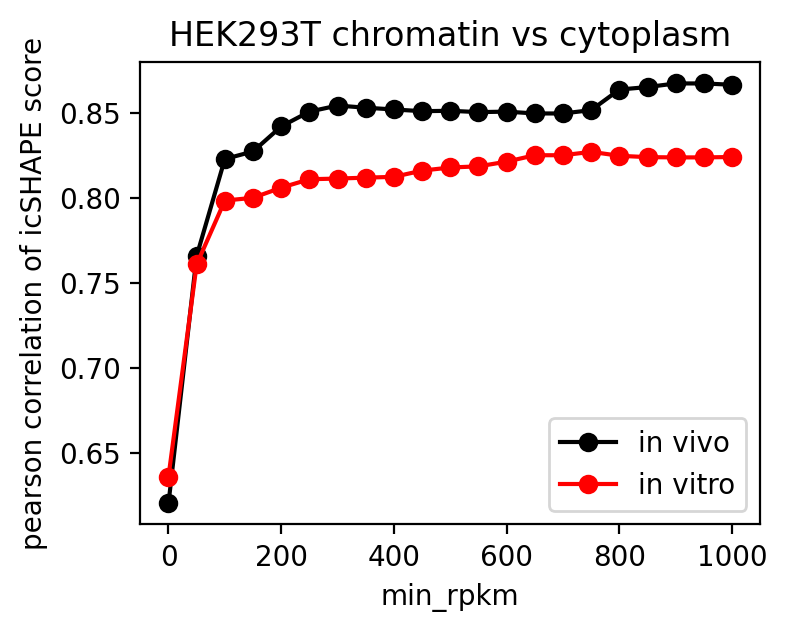

In [19]:
fig, axs = plt.subplots(figsize=(4, 3), sharex=True, sharey=True)

axs.plot(x, [coeffs_p[i][0] for i in range(len(coeffs_p))], '-ok', label='in vivo')
axs.plot(x, [coeffs_p[i][1] for i in range(len(coeffs_p))], '-or', label='in vitro')
axs.set_title('HEK293T chromatin vs cytoplasm')
axs.set_xlabel('min_rpkm')
axs.set_ylabel('pearson correlation of icSHAPE score')
axs.legend(loc='lower right')

plt.show()

# Figure S7c

In [20]:
# spt4 vs wt

wild_nas = combine_profiles([ DMS_Profile('../data/processed/pro_wild_1_mRNA_agg.pkl', 'wild_R1', genome), 
                              DMS_Profile('../data/processed/pro_wild_2_mRNA_agg.pkl', 'wild_R2', genome), 
                              DMS_Profile('../data/processed/pro_wild_3_mRNA_agg.pkl', 'wild_R3', genome),
                              DMS_Profile('../data/processed/pro_wild_4_mRNA_agg.pkl', 'wild_R4', genome), 
                              DMS_Profile('../data/processed/pro_wild_5_mRNA_agg.pkl', 'wild_R5', genome), 
                              DMS_Profile('../data/processed/pro_wild_6_mRNA_agg.pkl', 'wild_R6', genome),
                              DMS_Profile('../data/processed/pro_wild_7_mRNA_agg.pkl', 'wild_R7', genome), 
                              DMS_Profile('../data/processed/pro_wild_8_mRNA_agg.pkl', 'wild_R8', genome)], '', genome, min_cov=1000)


spt4_nas = combine_profiles([ DMS_Profile('../data/processed/pro_spt4_1_mRNA_agg.pkl', 'spt4_R1', genome), 
                              DMS_Profile('../data/processed/pro_spt4_2_mRNA_agg.pkl', 'spt4_R2', genome), 
                              DMS_Profile('../data/processed/pro_spt4_3_mRNA_agg.pkl', 'spt4_R8', genome)], '', genome, min_cov=1000)

wild_mat = combine_profiles([ DMS_Profile('../data/processed/mat_wild_1_mRNA_agg.pkl', 'wild_R1', genome), 
                              DMS_Profile('../data/processed/mat_wild_2_mRNA_agg.pkl', 'wild_R2', genome), 
                              DMS_Profile('../data/processed/mat_wild_3_mRNA_agg.pkl', 'wild_R8', genome)], '', genome, min_cov=1000)


spt4_mat = combine_profiles([ DMS_Profile('../data/processed/mat_spt4_1_mRNA_agg.pkl', 'spt4_R1', genome), 
                              DMS_Profile('../data/processed/mat_spt4_2_mRNA_agg.pkl', 'spt4_R2', genome), 
                              DMS_Profile('../data/processed/mat_spt4_3_mRNA_agg.pkl', 'spt4_R8', genome)], '', genome, min_cov=1000)


In [21]:
# nascent
mask_wild = np.hstack([np.hstack(wild_nas.mask_p), np.hstack(wild_nas.mask_m)])
mask_spt4 = np.hstack([np.hstack(spt4_nas.mask_p), np.hstack(spt4_nas.mask_m)])
mask_sequ = np.hstack([np.hstack(genome.mask_seq), ~np.hstack(genome.mask_seq)])
mask_tot = mask_wild & mask_spt4 & mask_sequ

wild_all = np.hstack([np.hstack(wild_nas.rat_p), np.hstack(wild_nas.rat_m)])[mask_tot]
spt4_all = np.hstack([np.hstack(spt4_nas.rat_p), np.hstack(spt4_nas.rat_m)])[mask_tot]


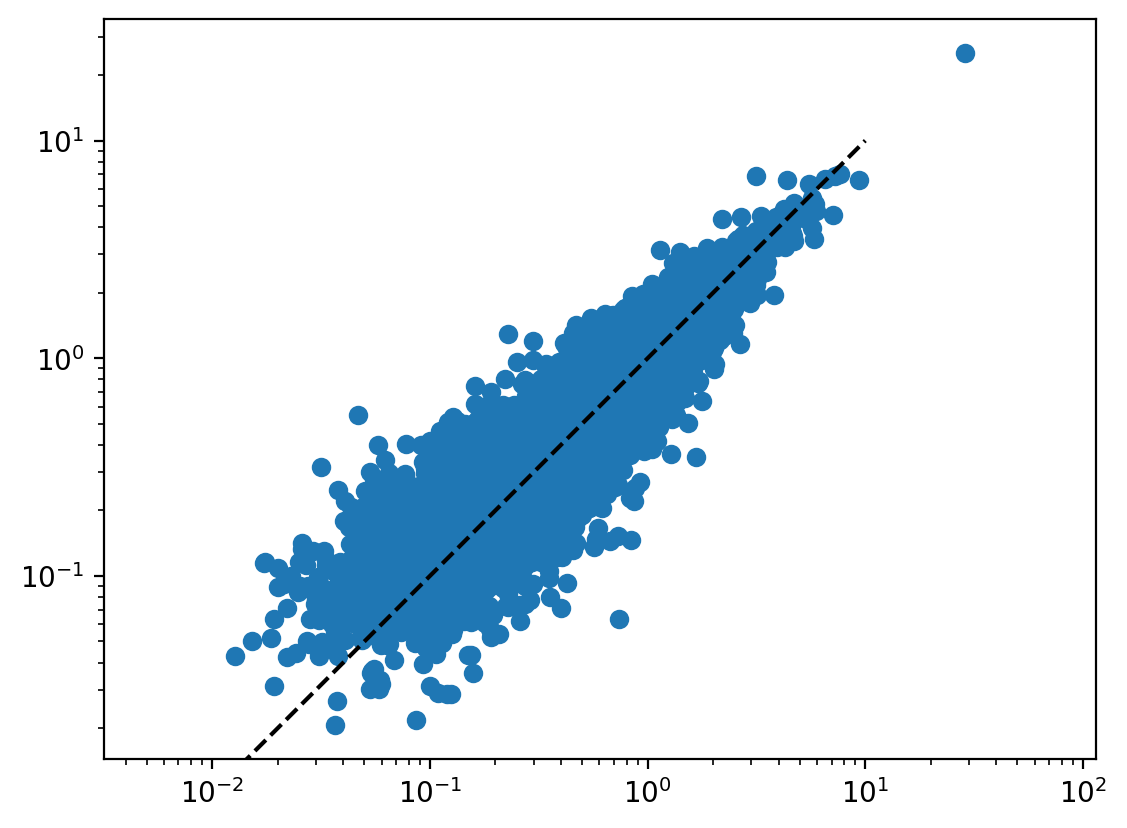

In [22]:
plt.scatter(wild_all*wild_nas.fac_norm, spt4_all*spt4_nas.fac_norm, rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.plot([0, 10], [0, 10], '--k')
plt.axis('equal')
plt.show()

In [23]:
# mature
mask_wild = np.hstack([np.hstack(wild_mat.mask_p), np.hstack(wild_mat.mask_m)])
mask_spt4 = np.hstack([np.hstack(spt4_mat.mask_p), np.hstack(spt4_mat.mask_m)])
mask_sequ = np.hstack([np.hstack(genome.mask_seq), ~np.hstack(genome.mask_seq)])
mask_tot = mask_wild & mask_spt4 & mask_sequ

wild_all = np.hstack([np.hstack(wild_mat.rat_p), np.hstack(wild_mat.rat_m)])[mask_tot]
spt4_all = np.hstack([np.hstack(spt4_mat.rat_p), np.hstack(spt4_mat.rat_m)])[mask_tot]

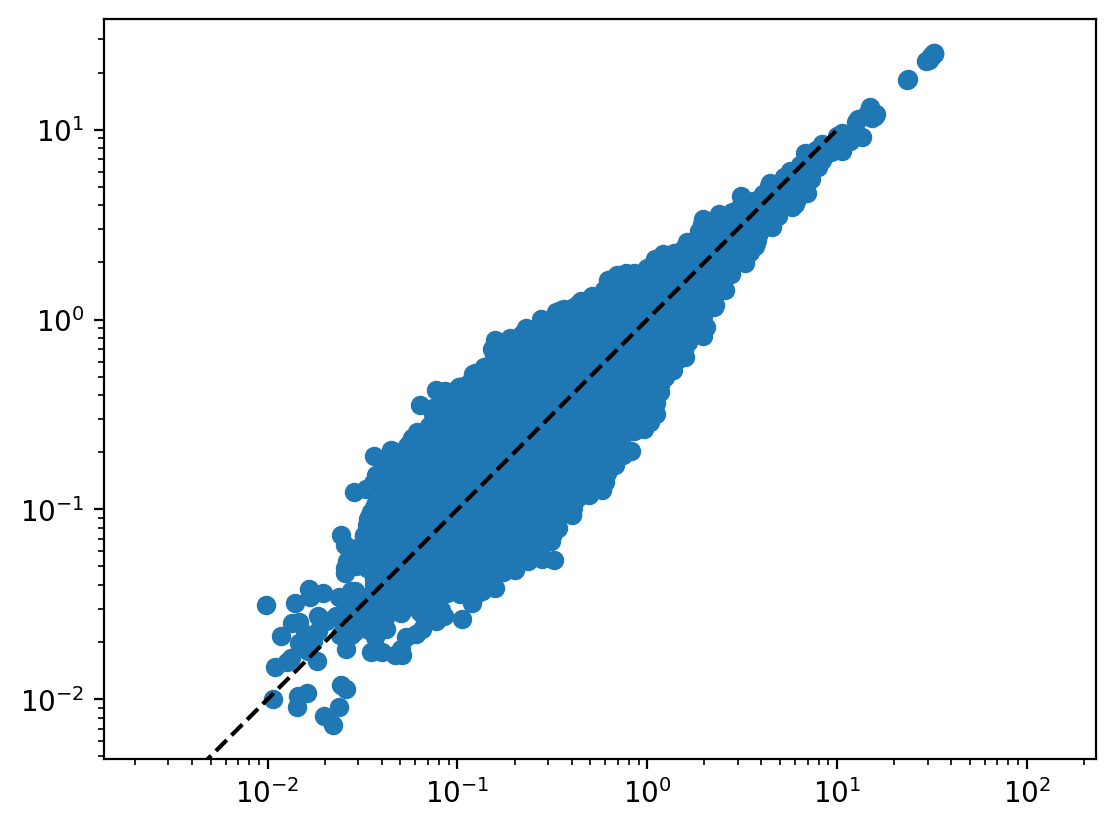

In [24]:
plt.scatter(wild_all*wild_mat.fac_norm, spt4_all*spt4_mat.fac_norm, rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.plot([0, 10], [0, 10], '--k')
plt.axis('equal')
plt.show()

# Figure S7e

In [25]:
from src.DMS_Profile import HDP

In [26]:
# mature mRNA HDProbe

thresh_col = 'padj_BH'

annotation = Annotation('../data/genome/scer_kan.gff')
mat_dbp3 = HDP('../data/processed/dbp3_mrna.csv', 'mat_dbp3m', thresh_col=thresh_col)
mat_dbp3.annotate_hits(annotation)
mat_dbp7 = HDP('../data/processed/dbp7_mrna.csv', 'mat_dbp7m', thresh_col=thresh_col)
mat_dbp7.annotate_hits(annotation)
mat_stm1 = HDP('../data/processed/stm1_mrna.csv', 'mat_stm1m', thresh_col=thresh_col)
mat_stm1.annotate_hits(annotation)
mat_spt4 = HDP('../data/processed/spt4_mrna.csv', 'mat_spt4m', thresh_col=thresh_col)
mat_spt4.annotate_hits(annotation)
mat_dst1 = HDP('../data/processed/dst1_mrna.csv', 'mat_dst1m', thresh_col=thresh_col)
mat_dst1.annotate_hits(annotation)

intron-containing transcripts: 283
intron-less transcripts: 6290
structured RNA transcripts: 100


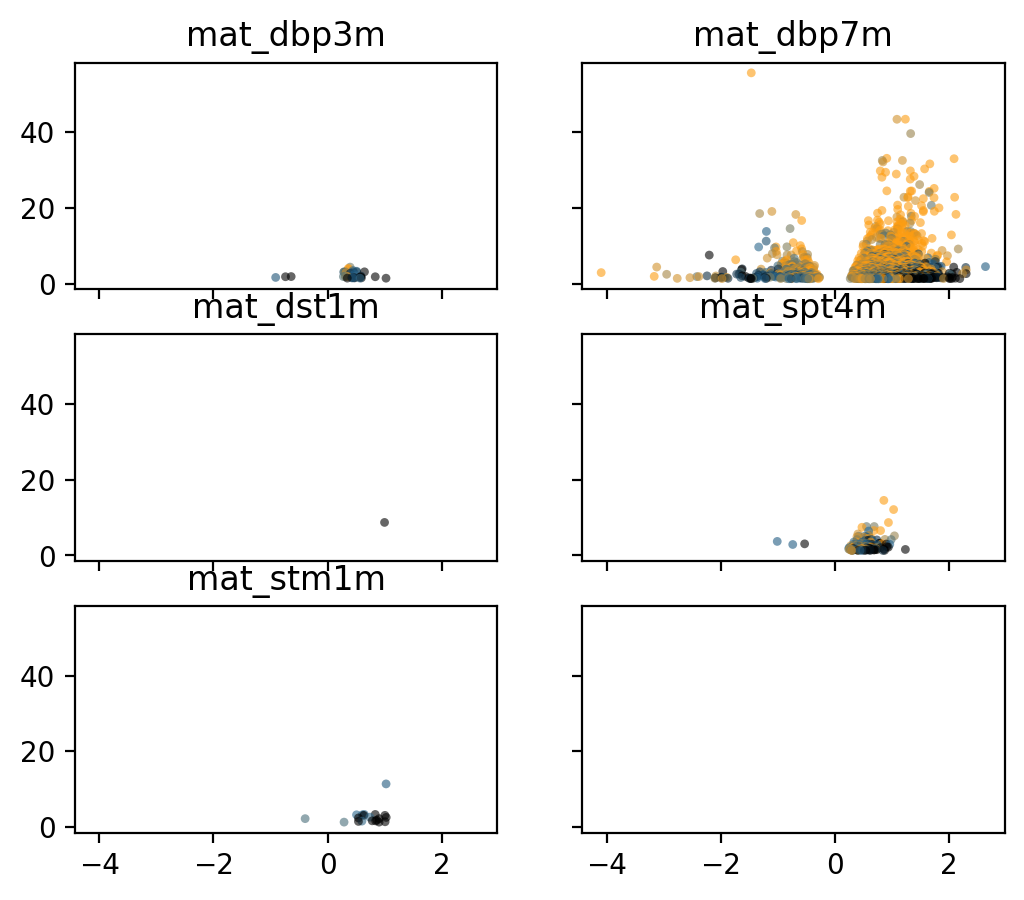

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(6,5), sharex=True, sharey=True)
axs = axs.flatten()

for i, hdp in enumerate([mat_dbp3, mat_dbp7, mat_dst1, mat_spt4, mat_stm1]):
    hdp.erupt(axs[i], cmap_loc='../cmap.txt', alpha=0.6, edgecolors='none')
    axs[i].set_title(hdp.sample_id)
    
plt.show()

# Figure S7f

In [28]:
mat_wild_1 = DMS_Profile('../data/processed/mat_wild_1_mRNA_agg.pkl', 's', genome)
mat_wild_2 = DMS_Profile('../data/processed/mat_wild_2_mRNA_agg.pkl', 's', genome)
mat_wild_3 = DMS_Profile('../data/processed/mat_wild_3_mRNA_agg.pkl', 's', genome)
mat_wild   = combine_profiles([mat_wild_1, mat_wild_2, mat_wild_3], 'wild', genome, min_cov=800)

mat_dbp7_1 = DMS_Profile('../data/processed/mat_dbp7_1_mRNA_agg.pkl', 's', genome)
mat_dbp7_2 = DMS_Profile('../data/processed/mat_dbp7_2_mRNA_agg.pkl', 's', genome)
mat_dbp7_3 = DMS_Profile('../data/processed/mat_dbp7_3_mRNA_agg.pkl', 's', genome)
mat_dbp7   = combine_profiles([mat_dbp7_1, mat_dbp7_2, mat_dbp7_3], 'dbp7', genome, min_cov=800)

dbp7_hdp = HDP('../data/processed/dbp7_mrna.csv', 'mat_dbp7m', thresh_col=thresh_col)
dbp7_hdp.annotate_hits(annotation)

/opt/homebrew/Caskroom/miniforge/base/envs/CoST/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [29]:
binsize=0.075
bins_hit, hist_hit, bins_cov_dbp7, hist_cov_dbp7, rela_all, anno_all = dbp7_hdp.get_hdp_meta(annotation, mat_dbp7.cov_p, mat_dbp7.cov_m, sig_threshold=0.05, binsize=0.075, n_bins_cov=100)
_       ,        _, bins_cov_wild, hist_cov_wild, _       , _        = dbp7_hdp.get_hdp_meta(annotation, mat_wild.cov_p, mat_wild.cov_m, sig_threshold=0.05, binsize=0.075, n_bins_cov=100)

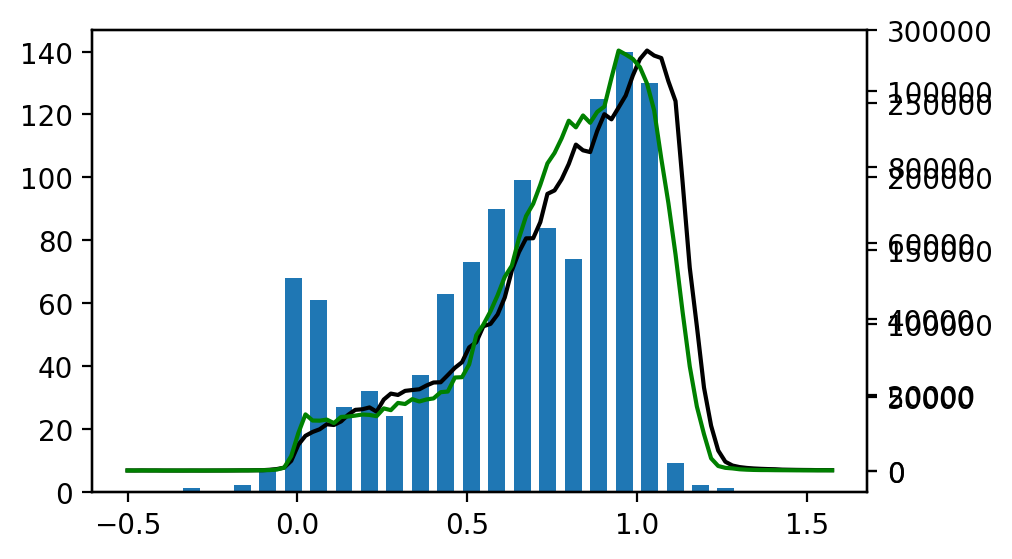

In [30]:
fig, ax1 = plt.subplots(figsize=(5,3))

ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.bar(bins_hit, hist_hit, 0.05)
ax2.plot(bins_cov_dbp7, hist_cov_dbp7, '-k')
ax3.plot(bins_cov_wild, hist_cov_wild, '-g')
plt.show()